In [1]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
print(df.head())
print(df.info())
print(df['Attrition'].value_counts())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [6]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

X = df.drop('Attrition', axis=1)
y = df['Attrition']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8673469387755102

Confusion Matrix:
 [[251   4]
 [ 35   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



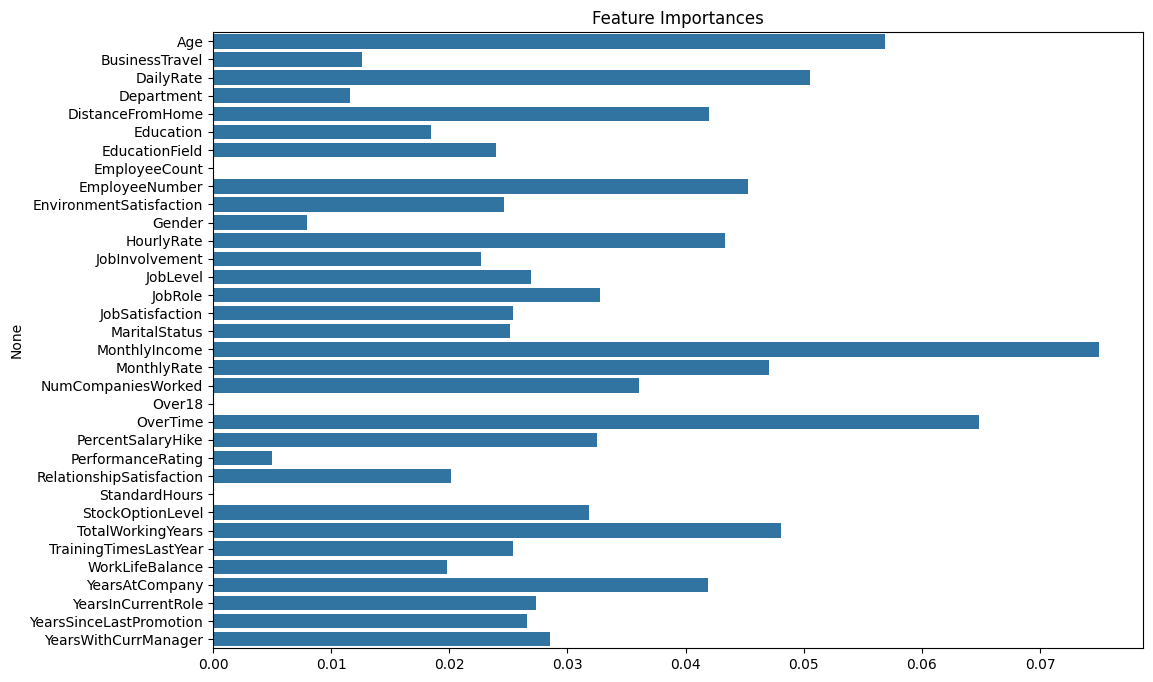

In [11]:
feature_importances = model.feature_importances_
features = df.drop('Attrition', axis=1).columns

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()